In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# set font size
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

sns.set_style('whitegrid')

In [71]:
df = pd.DataFrame(np.random.randint(0,10,size=(100, 1)), columns=['Integers'])

In [72]:
# Function for creating distribution + cumulative dist chart
def distribution_chart(dataframe, column, xstart, xend, bin, title, xlabel, ylabel):
  # bin_count required for left/right yticks setup on chart
  chart_data = dataframe[column].loc[dataframe[column] <= xend]
  bin_int = int(xend/bin)
  bin_count = pd.cut(chart_data, np.arange(xstart, xend, bin)).value_counts()
 
  fig, ax1 = plt.subplots(figsize=(15,5))

  color = 'tab:blue'
  ax1 = dataframe[column].plot.hist(bins=np.arange(xstart, xend, bin),
                                    cumulative=False, density=False, color=color)
  ax1.set_xlabel(xlabel)
  ax1.set_ylabel(ylabel)
  ax1.set_yticks((0, 0.2*max(bin_count), 0.4*max(bin_count), 0.6*max(bin_count), 0.8*max(bin_count), 1.0*max(bin_count)))
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.set_title(title)

  ax2 = ax1.twinx()

  color = 'tab:red'
  ax2 = dataframe[column].plot.hist(bins=np.arange(xstart, xend, bin),
                                    cumulative=True, density=True, histtype='step', color=color)
  ax2.set_ylabel('Cumulative Ratio from Total', color=color)
  ax2.set_yticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0))
  ax2.tick_params(axis='y', labelcolor=color)

  plt.xlim([xstart, xend])

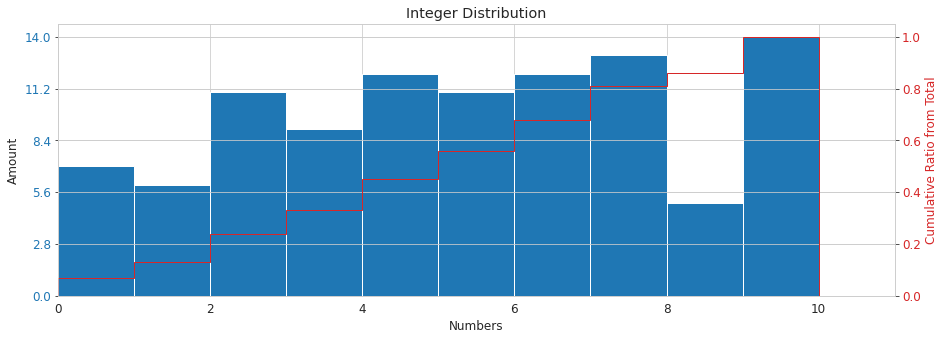

In [73]:
distribution_chart(df, 'Integers', 0, 11, 1, 'Integer Distribution', 'Numbers', 'Amount')